In [227]:
## IMPORTANT - Important Investopedia Article to get an idea about EMA (Exponential Moving Average)
## https://www.investopedia.com/terms/e/ema.asp


## Importing necessary libraries

import yfinance as yf
import matplotlib.pyplot as plt


In [228]:
df = yf.download('SBIN.NS', period='1d', interval='1m')

[*********************100%***********************]  1 of 1 completed


In [229]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-03-31 09:15:00+05:30,520.500000,521.750000,519.599976,521.400024,521.400024,0
2023-03-31 09:16:00+05:30,521.150024,522.250000,520.950012,522.250000,522.250000,132192
2023-03-31 09:17:00+05:30,522.250000,522.400024,521.650024,522.150024,522.150024,133200
2023-03-31 09:18:00+05:30,522.200012,522.900024,522.200012,522.250000,522.250000,153558
2023-03-31 09:19:00+05:30,522.099976,522.349976,521.150024,521.299988,521.299988,122288
...,...,...,...,...,...,...
2023-03-31 15:25:00+05:30,523.150024,523.549988,523.150024,523.349976,523.349976,114000
2023-03-31 15:26:00+05:30,523.400024,523.599976,522.900024,523.200012,523.200012,128646
2023-03-31 15:27:00+05:30,523.200012,523.849976,523.000000,523.049988,523.049988,129616


In [230]:
## Defining the shortTerm & longTerm Values to calculate the Moving Average.

shortTerm = 12
longTerm = 26


In [231]:
def addMACDSignals(df):
    df['EMA-Short'] = df['Close'].ewm(span = shortTerm, adjust = False).mean()
    df['EMA-Long'] = df['Close'].ewm(span = longTerm, adjust = False).mean()
    df['MACD'] = df['EMA-Short'] - df['EMA-Long']
    
    # signal Line would be 9 days Exponential Moving Average of MACD line.
    df['signalLine'] = df['MACD'].ewm(span = 9).mean()

In [232]:
## Adding the MACD Signals in data frame.

addMACDSignals(df)

In [233]:
df

,Open,High,Low,Close,Adj Close,Volume,EMA-Short,EMA-Long,MACD,signalLine
Datetime,,,,,,,,,,
2023-03-31 09:15:00+05:30,520.500000,521.750000,519.599976,521.400024,521.400024,0,521.400024,521.400024,0.000000,0.000000
2023-03-31 09:16:00+05:30,521.150024,522.250000,520.950012,522.250000,522.250000,132192,521.530790,521.462986,0.067804,0.037669
2023-03-31 09:17:00+05:30,522.250000,522.400024,521.650024,522.150024,522.150024,133200,521.626057,521.513877,0.112179,0.068206
2023-03-31 09:18:00+05:30,522.200012,522.900024,522.200012,522.250000,522.250000,153558,521.722048,521.568405,0.153643,0.097148
2023-03-31 09:19:00+05:30,522.099976,522.349976,521.150024,521.299988,521.299988,122288,521.657116,521.548522,0.108593,0.100553
...,...,...,...,...,...,...,...,...,...,...
2023-03-31 15:25:00+05:30,523.150024,523.549988,523.150024,523.349976,523.349976,114000,523.327671,523.366034,-0.038363,0.095093
2023-03-31 15:26:00+05:30,523.400024,523.599976,522.900024,523.200012,523.200012,128646,523.308031,523.353736,-0.045705,0.066933
2023-03-31 15:27:00+05:30,523.200012,523.849976,523.000000,523.049988,523.049988,129616,523.268332,523.331236,-0.062904,0.040966


In [234]:
## Implementing the CORE logic of Strategy.

## - At a given day, if MACD is above signalLine but not the day before -> Then BUY.
## - At a given day, if signalLine is above MACD but not the day before -> Then SELL.

buyList = []
sellList = []

for i in range(len(df)):
    if i > 0 and df.iloc[i]['MACD'] > df.iloc[i]['signalLine'] and df.iloc[i - 1]['MACD'] < df.iloc[i - 1]['signalLine']:
        buyList.append(i)
    elif i > 0 and df.iloc[i]['signalLine'] > df.iloc[i]['MACD'] and df.iloc[i - 1]['signalLine'] < df.iloc[i - 1]['MACD']:
        sellList.append(i)


In [235]:
buyList

[8,
 14,
 29,
 44,
 47,
 54,
 60,
 69,
 83,
 89,
 139,
 142,
 147,
 184,
 229,
 245,
 257,
 292,
 305,
 313,
 325]

In [236]:
sellList

[5,
 13,
 20,
 30,
 45,
 52,
 57,
 61,
 74,
 86,
 129,
 140,
 146,
 148,
 211,
 234,
 246,
 275,
 294,
 309,
 315,
 357]

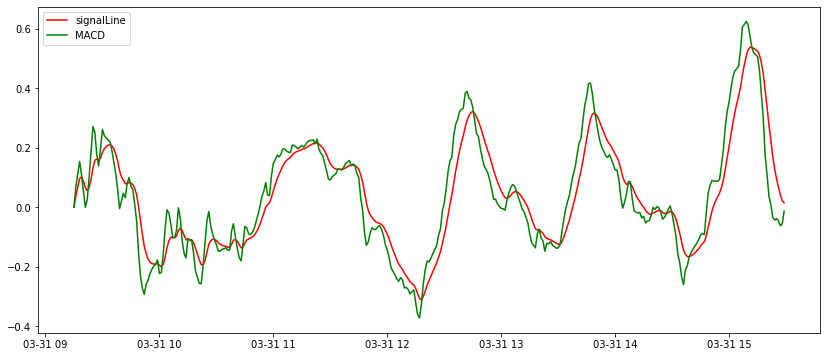

In [237]:
## Plotting the MACD & Signal Line.

## Increasing the figure size
plt.figure(figsize = (14, 6))

#plt.plot(df['Adj Close'], label = 'Asset Price', color = 'magenta')
plt.plot(df['signalLine'], label = 'signalLine', color = 'red')
plt.plot(df['MACD'], label = 'MACD', color = 'green')

## Adding the marker on buying Index & selling Index.
#plt.scatter(df.iloc[buyList].index, df.iloc[buyList]['Adj Close'], marker = '^', color = 'g', s = 100)
#plt.scatter(df.iloc[sellList].index, df.iloc[sellList]['Adj Close'], marker = 'v', color = 'r', s = 100)

plt.legend()
plt.show()

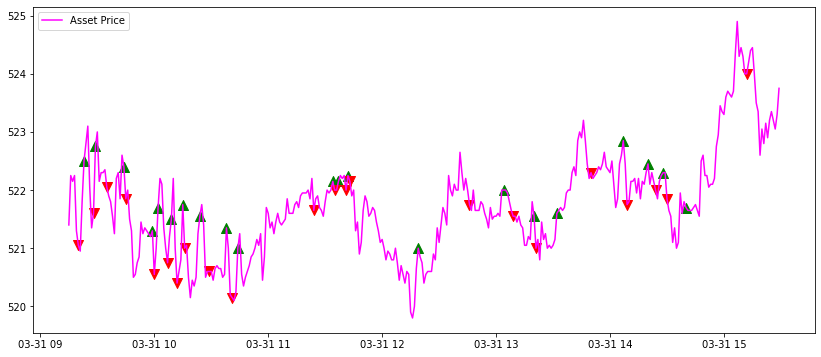

In [238]:
## Plotting the Buy & Sell Signals.

## Increasing the figure size
plt.figure(figsize = (14, 6))
plt.plot(df['Close'], label = 'Asset Price', color = 'magenta')


## Adding the marker on buying Index & selling Index.
plt.scatter(df.iloc[buyList].index, df.iloc[buyList]['Close'], marker = '^', color = 'g', s = 100)
plt.scatter(df.iloc[sellList].index, df.iloc[sellList]['Close'], marker = 'v', color = 'r', s = 100)

plt.legend()
plt.show()